In [1]:
%matplotlib inline
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from scipy.stats import describe
from numpy.linalg import norm

In [2]:
# obtain stats regarding the cyan dataset
data_dir = '../data/cyan_dataset'
train_dir = os.path.join(data_dir, 'train')
labeled_dir = os.path.join(train_dir, 'cyan_labeled')
noisy_labeled_file_name = os.path.join(train_dir, 'noisy_labeled.txt')

# parse noisy labeled files
with open(noisy_labeled_file_name, 'r') as noisy_labeled_file:
    noisy_file_names = noisy_labeled_file.readlines()
noisy_file_names = [name[:-1] for name in noisy_file_names]

# obtain stats regading cyan dataset
def get_nonzero_stat(img):
    nonzero_idx = img.nonzero()
    nonzero_rate = float(nonzero_idx[0].shape[0]) \
        / (img.shape[0] * img.shape[1]) 
    color_value = img[nonzero_idx[0], nonzero_idx[1]]  # n x 3
    return nonzero_rate, color_value

file_names = os.listdir(labeled_dir)
nonzero_rates = []
rgb_values = []
hsv_values = []
for file_name in file_names:
    file_path = os.path.join(labeled_dir, file_name)
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # plt.imshow(img)
    # plt.show()
    
    nonzero_idx = img.nonzero()
    nonzero_rate = float(nonzero_idx[0].shape[0]) \
        / (img.shape[0] * img.shape[1]) 
    rgb_value = img[nonzero_idx[0], nonzero_idx[1]]  # n x 3
    nonzero_rates.append(nonzero_rate)
    rgb_values.append(rgb_value)
    
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv_value = hsv_img[nonzero_idx[0], nonzero_idx[1]]  # n x 3
    hsv_values.append(hsv_value)

rgb_values = np.concatenate(rgb_values, axis=0)  # np.array of  N x 3
hsv_values = np.concatenate(hsv_values, axis=0)  # np.array of N x 3


In [3]:
print('nonzero pixel rate')
print(describe(nonzero_rates))

nonzero pixel rate
DescribeResult(nobs=100, minmax=(0.0010691039441550411, 0.08553530313988142), mean=0.016795601542720064, variance=0.00030251881357744775, skewness=2.034756281386639, kurtosis=3.950130658354092)


RGB values


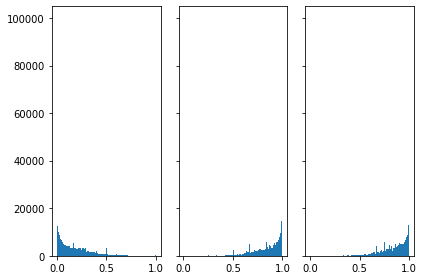

R: DescribeResult(nobs=480704, minmax=(0.0, 1.0), mean=0.16938371107995856, variance=0.02605637878349912, skewness=1.1840144623588105, kurtosis=1.3538791581579108)
G: DescribeResult(nobs=480704, minmax=(0.0, 1.0), mean=0.8719740866989852, variance=0.01971804783635318, skewness=-1.3936656404816257, kurtosis=1.968455309346468)
B: DescribeResult(nobs=480704, minmax=(0.0, 1.0), mean=0.8691811160624549, variance=0.02023201987562085, skewness=-1.3748032880048104, kurtosis=1.9786899883496867)


In [4]:
print('RGB values')
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
num_bins = 255
norm_rgb_values = rgb_values / 255.
axs[0].hist(norm_rgb_values[:, 0], bins=num_bins)
axs[1].hist(norm_rgb_values[:, 1], bins=num_bins)
axs[2].hist(norm_rgb_values[:, 2], bins=num_bins)
plt.show()
print('R: {}'.format(describe(norm_rgb_values[:, 0])))
print('G: {}'.format(describe(norm_rgb_values[:, 1])))
print('B: {}'.format(describe(norm_rgb_values[:, 2])))

HSV values


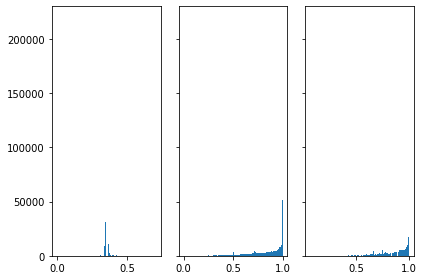

H: DescribeResult(nobs=480704, minmax=(0.0, 0.7019607843137254), mean=0.351201277342251, variance=0.0008907185021277495, skewness=-5.847795597108275, kurtosis=93.20977698394417)
S: DescribeResult(nobs=480704, minmax=(0.0, 1.0), mean=0.8039676366818862, variance=0.03680311142098, skewness=-1.2491280333877508, kurtosis=1.4202948722870419)
V: DescribeResult(nobs=480704, minmax=(0.06666666666666667, 1.0), mean=0.8839233748019248, variance=0.018157816691678662, skewness=-1.4228352951178755, kurtosis=1.908056518705549)


In [5]:
print('HSV values')
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
norm_hsv_values = hsv_values / 255.
axs[0].hist(norm_hsv_values[:, 0], bins=num_bins)
axs[1].hist(norm_hsv_values[:, 1], bins=num_bins)
axs[2].hist(norm_hsv_values[:, 2], bins=num_bins)
plt.show()
print('H: {}'.format(describe(norm_hsv_values[:, 0])))
print('S: {}'.format(describe(norm_hsv_values[:, 1])))
print('V: {}'.format(describe(norm_hsv_values[:, 2])))

rgb low: [-39.13120862 150.73877368 149.09921452]
rgb high: [125.51690127 293.96801054 294.18315467]
hsv low: [ 74.33543874 107.17275018 156.67755103]
hsv high: [104.777212 255.       255.      ]
0


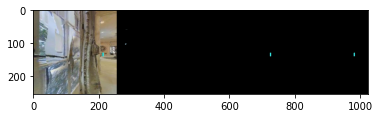

1


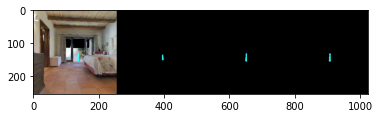

2


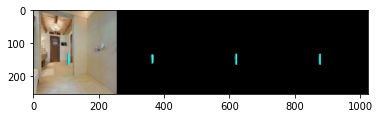

3


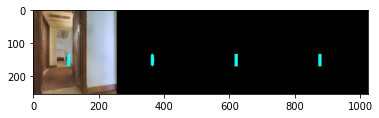

4


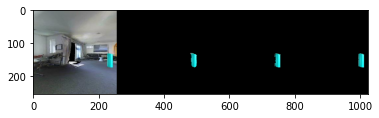

5


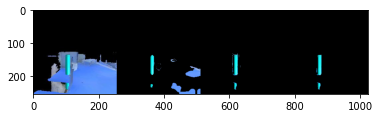

6


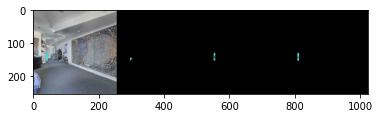

7


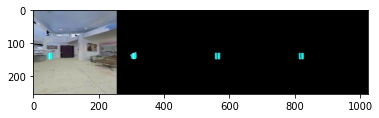

8


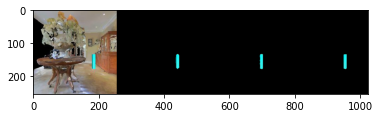

9


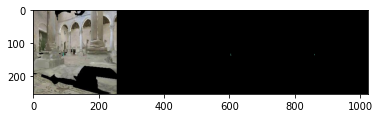

10


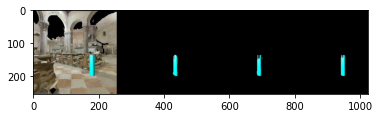

11


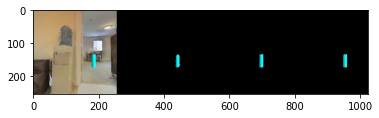

12


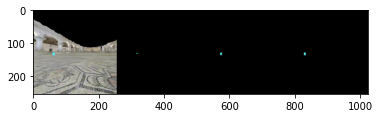

13


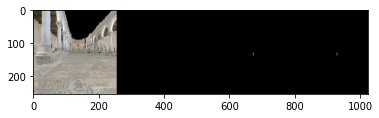

14


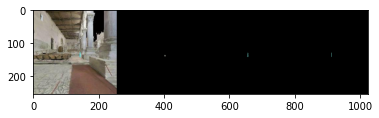

15


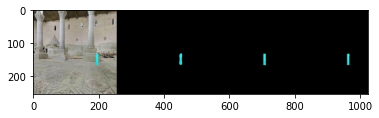

16


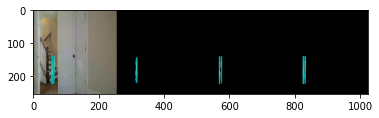

17


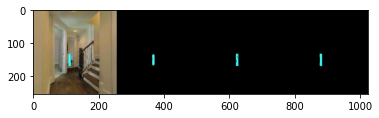

18


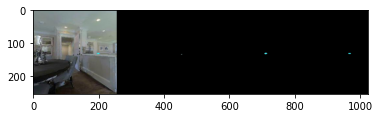

19


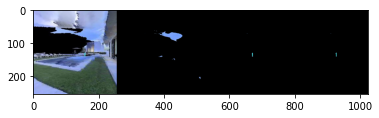

20


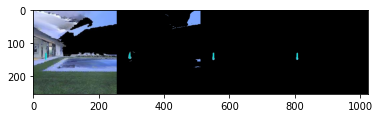

21


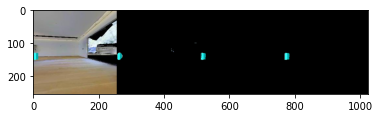

22


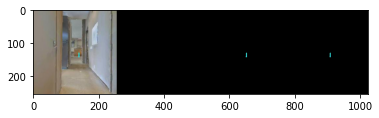

23


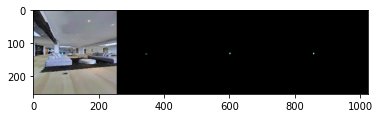

24


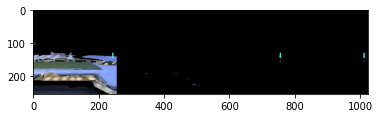

25


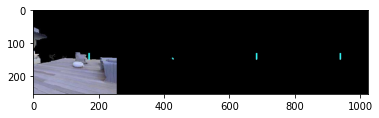

26


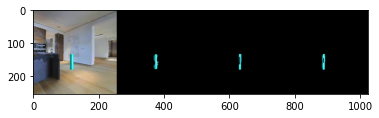

27


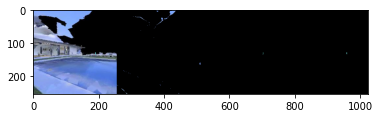

28


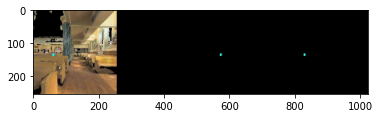

29


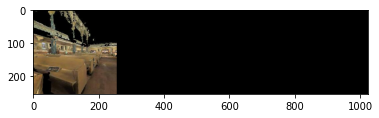

30


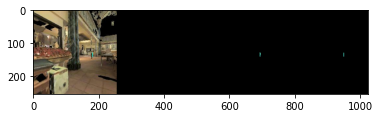

31


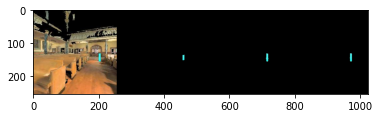

32


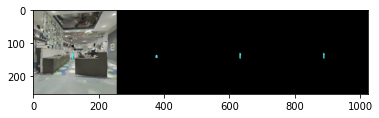

33


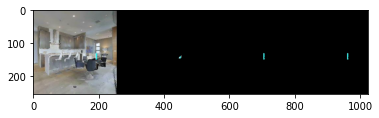

34


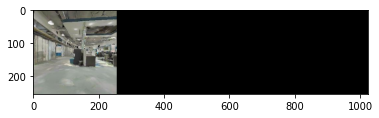

35


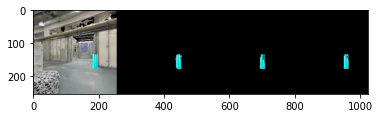

36


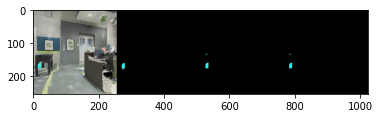

37


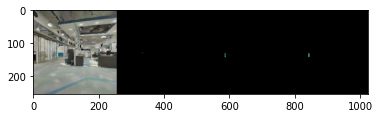

38


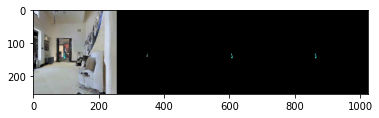

39


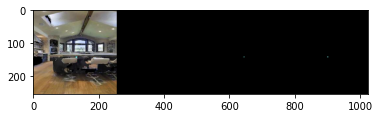

40


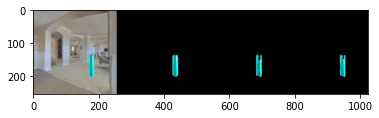

41


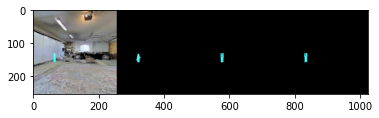

42


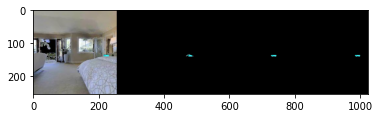

43


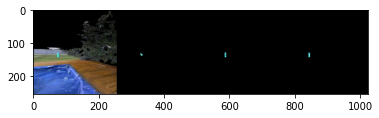

44


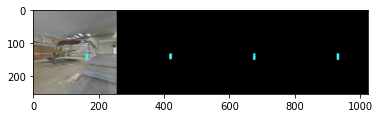

45


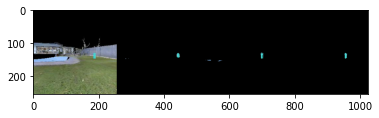

46


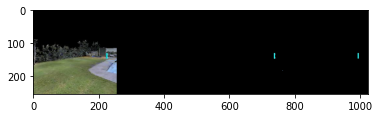

47


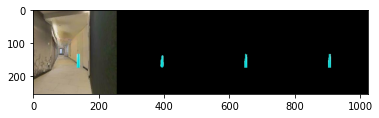

48


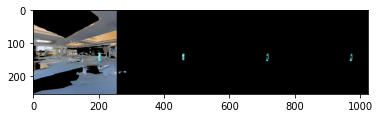

49


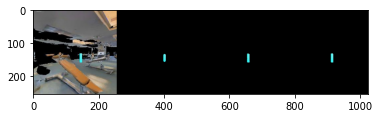

50


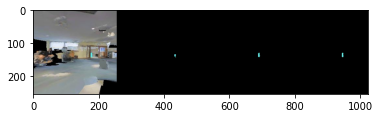

51


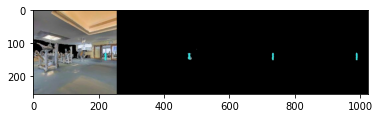

52


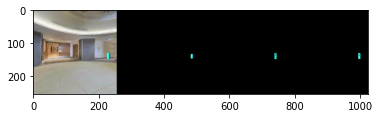

53


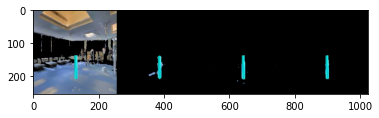

54


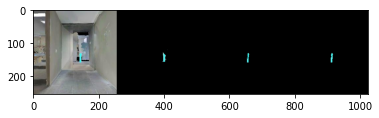

55


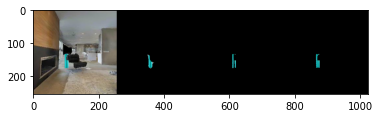

56


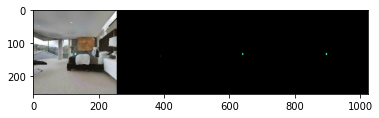

57


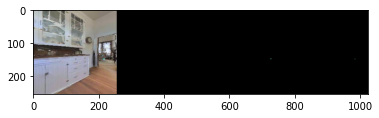

58


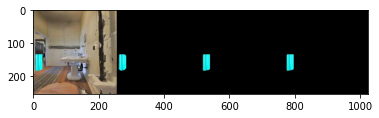

59


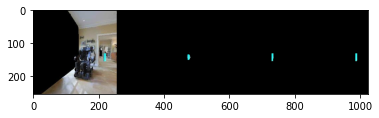

60


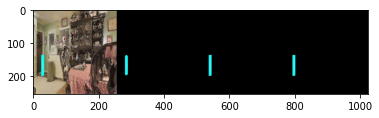

61


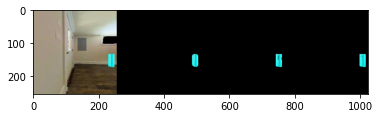

62


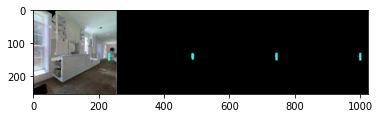

63


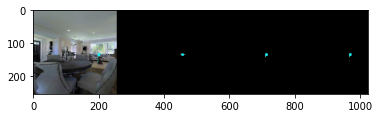

64


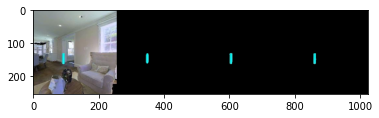

65


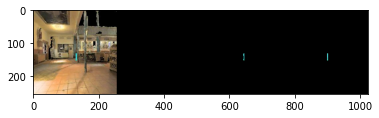

66


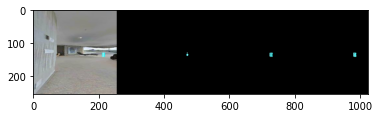

67


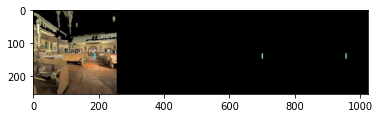

68


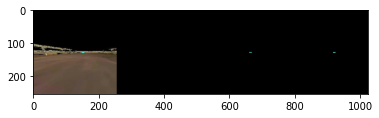

69


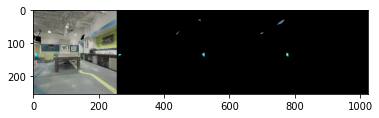

70


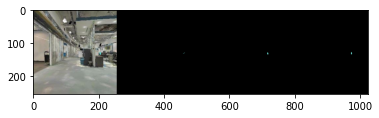

71


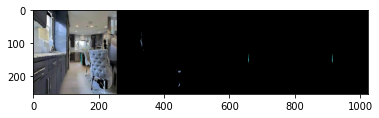

72


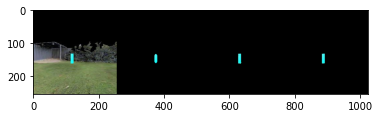

73


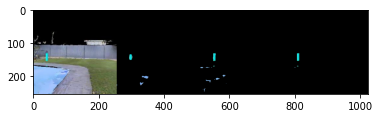

74


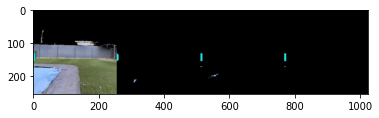

75


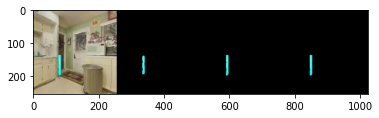

76


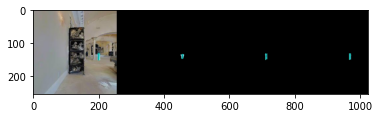

77


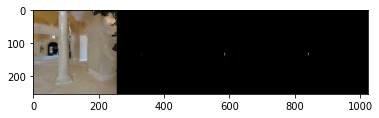

In [18]:
def hsv2hsv_cone(x):
    return np.stack([
        np.sin(x[:, :, 0]) * x[:, :, 1] * x[:, :, 2],
        np.cos(x[:, :, 0]) * x[:, :, 1] * x[:, :, 2],
        x[:, :, 2]
    ], axis=2)

# check in validation dataset
val_dir = os.path.join(data_dir, 'val')
val_cyan_dir = os.path.join(val_dir, 'true_cyan')
val_file_names = sorted(os.listdir(val_cyan_dir))

n_sigma = 2.
rgb_values_mean = rgb_values.mean(axis=0)
rgb_values_std = rgb_values.std(axis=0)
rgb_low = rgb_values_mean - n_sigma * rgb_values_std
rgb_high = rgb_values_mean + n_sigma * rgb_values_std
print('rgb low: {}'.format(rgb_low))
print('rgb high: {}'.format(rgb_high))

hsv_values_mean = hsv_values.mean(axis=0)
hsv_values_std = hsv_values.std(axis=0)
hsv_low = hsv_values_mean - n_sigma * hsv_values_std
# hsv_high = hsv_values_mean + n_sigma * hsv_values_std
print('hsv low: {}'.format(hsv_low))
print('hsv high: {}'.format(hsv_high))


for idx, val_file_name in enumerate(val_file_names):
    val_file_path = os.path.join(val_cyan_dir, val_file_name)
    rgb_img = cv2.imread(val_file_path)
    
    # obtain (1) rgb image and (2) rgb masked image with range
    rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
    rgb_blur_img = cv2.medianBlur(rgb_img ,11)
    rgb_mask = cv2.inRange(rgb_blur_img, rgb_low, rgb_high)
    rgb_masked_img = cv2.bitwise_and(rgb_img, rgb_img, mask=rgb_mask)
    
    # obtain (3) hsv image with range
    hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
    # hsv_blur_img = cv2.medianBlur(hsv_img ,11)
    hsv_mask = cv2.inRange(hsv_img, hsv_low, hsv_high)
    hsv_masked_img = cv2.bitwise_and(rgb_img, rgb_img, mask=hsv_mask)
    
    # obtain (4) hsv image with cone distance metric suggested by
    # https://stackoverflow.com/a/39113477
    hsv_metric_thres = 0.15
    norm_hsv_img = np.stack([
        (hsv_img[:, :, 0] / 179.) * 2 * np.pi,
        hsv_img[:, :, 1] / 255.,
        hsv_img[:, :, 2] / 255.
    ], axis=2)
    norm_hsv_mean = np.array([
        (hsv_values_mean[0] / 179.) * 2 * np.pi,
        hsv_values_mean[1] / 255.,
        hsv_values_mean[2] / 255.,
    ]).reshape(1, 1, 3)

    hsv_dist = np.sum((
        hsv2hsv_cone(norm_hsv_img) 
        - hsv2hsv_cone(norm_hsv_mean)
    )**2, axis=2)
    hsv_dist_mask = hsv_dist < hsv_metric_thres
    hsv_dist_mask = hsv_dist_mask.reshape(hsv_dist.shape[0], hsv_dist.shape[1], 1)
    hsv_dist_masked_img = rgb_img * hsv_dist_mask

    # hsv_dist_mask = np.nonzero(h)
    vis = np.concatenate([
        rgb_img,
        rgb_masked_img,
        hsv_masked_img,
        hsv_dist_masked_img
    ], axis=1)
    
    print(idx)
    plt.imshow(vis)
    plt.show()